### Описание: 
Анализ данных вакансий HH.ru на примере data analyst и system analyst
### Цель проекта: 
Выявить различия в предлагаемых вакансиях для Аналитиков данных и Системных аналитиков
### Исходные данные 
Данные получены из API HH.ru

### Гипотеза:
в ходе исследования данных о вакансиях Аналитиков данных(DA) и Системных аналитиков(SA) сформировать типовые портреты соисткателей согласно обозначенных треббований, выявить какие требуемые навыки являются общими, а какие различаются


#### 1. Предобработка данных.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine 
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import style


In [33]:
da = pd.read_csv(r'C:\Users\Vitte\OneDrive\Документы\Dataset\Aналитика_hh_(da+sa)\vacancies_da.csv', sep=";", encoding='windows_1251')


In [34]:
sa = pd.read_csv(r'C:\Users\Vitte\OneDrive\Документы\Dataset\Aналитика_hh_(da+sa)\vacancies_sa.csv', sep=";",encoding='windows_1251') #, encoding='windows_1250'

In [35]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                1801 non-null   int64  
 1   name                              1801 non-null   object 
 2   published_at                      1801 non-null   object 
 3   alternate_url                     1801 non-null   object 
 4   type                              1801 non-null   object 
 5   employer                          1801 non-null   object 
 6   department                        521 non-null    object 
 7   area                              1801 non-null   object 
 8   experience                        1801 non-null   object 
 9   key_skills                        1801 non-null   object 
 10  schedule                          1801 non-null   object 
 11  employment                        1801 non-null   object 
 12  descri

In [36]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                1915 non-null   int64  
 1   name                              1915 non-null   object 
 2   published_at                      1915 non-null   object 
 3   alternate_url                     1915 non-null   object 
 4   type                              1915 non-null   object 
 5   employer                          1915 non-null   object 
 6   department                        361 non-null    object 
 7   area                              1915 non-null   object 
 8   experience                        1915 non-null   object 
 9   key_skills                        1915 non-null   object 
 10  schedule                          1915 non-null   object 
 11  employment                        1915 non-null   object 
 12  descri

In [37]:
da.isna().sum()

id                                     0
name                                   0
published_at                           0
alternate_url                          0
type                                   0
employer                               0
department                          1280
area                                   0
experience                             0
key_skills                             0
schedule                               0
employment                             0
description                            0
description_lemmatized                 0
salary_from                         1453
salary_to                           1573
salary_bin                             0
key_skills_from_key_skills_field     708
hard_skills_from_description        1383
soft_skills_from_description        1213
dtype: int64

In [38]:
sa.isna().sum()

id                                     0
name                                   0
published_at                           0
alternate_url                          0
type                                   0
employer                               0
department                          1554
area                                   0
experience                             0
key_skills                             0
schedule                               0
employment                             0
description                            0
description_lemmatized                 0
salary_from                         1559
salary_to                           1636
salary_bin                             0
key_skills_from_key_skills_field     641
hard_skills_from_description        1345
soft_skills_from_description         488
dtype: int64

In [39]:
da.duplicated().sum()

0

в датасете da всего 1801 запись с вакансиями. пропуски в столбцах department (работодатель), salary_from нижняя граница ЗП, salary_to верхняя граница ЗП, key_skills_from_key_skills_field - ключевые навыки, hard_skills_from_description - харды,soft_skills_from_description - софты. Полных дубликатов нет.

приведем для датафреймов da и sa наименования по полям name employer area key_skills_from_key_skills_field по символам е/ё к единой форме и к нижнему регистру

In [42]:
# приведем для датафреймов da и sa наименования по полям name employer area key_skills_from_key_skills_field по символам е/ё к единой форм
da['name'] = da['name'].replace(['ё'], 'е', regex=True)
da['employer'] = da['employer'].replace(['ё'], 'е', regex=True)
da['area'] = da['area'].replace(['ё'], 'е', regex=True)
da['key_skills'] = da['key_skills'].replace(['ё'], 'е', regex=True)
da['key_skills_from_key_skills_field'] = da['key_skills_from_key_skills_field'].replace(['ё'], 'е', regex=True)

sa['name'] = sa['name'].replace(['ё'], 'е', regex=True)
sa['employer'] = sa['employer'].replace(['ё'], 'е', regex=True)
sa['area'] = sa['area'].replace(['ё'], 'е', regex=True)
sa['key_skills'] = sa['key_skills'].replace(['ё'], 'е', regex=True)
sa['key_skills_from_key_skills_field'] = sa['key_skills_from_key_skills_field'].replace(['ё'], 'е', regex=True)

In [43]:
# приведем для датафреймов da и sa наименования по полям name employer area по символам в нижний регистр к единой форм
da['name'] = da['name'].str.lower()
da['employer'] = da['employer'].str.lower()
da['area'] = da['area'].str.lower()
da['key_skills'] = da['key_skills'].str.lower()
da['key_skills_from_key_skills_field'] = da['key_skills_from_key_skills_field'].str.lower()


sa['name'] = sa['name'].str.lower()
sa['employer'] = sa['employer'].str.lower()
sa['area'] = sa['area'].str.lower()
sa['key_skills'] = sa['key_skills'].str.lower()
sa['key_skills_from_key_skills_field'] = sa['key_skills_from_key_skills_field'].str.lower()

In [44]:
#display(da[da.duplicated(['name', 'employer', 'area', 'experience', 'department', 'description_lemmatized'])])

In [45]:
display(da.head())

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,dns головной офис,NaN,владивосток,Junior (no experince),"['power bi', 'субд', 'python', 'sql']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"sql, power bi, python, субд",NaN,NaN
1,100039480,аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,комус,NaN,москва,Junior (no experince),"['ms sql', 'работа с базами данных', 'ms excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"работа с базами данных, ms sql, ms excel",NaN,NaN
2,100042705,аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,dns головной офис,NaN,владивосток,Junior+ (1-3 years),"['sql', 'power bi', 'субд', 'python', 'clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"sql, power bi, python, субд, bpmn, clickhouse",NaN,NaN
3,100046788,ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,х5 group,"X5 GROUP, Центральный офис",москва,Junior+ (1-3 years),"['анализ данных', 'коммуникация', 'sql', 'ms o...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"ms office, sql, python, hadoop, нive, аналитич...","Pandas, Юнит-экономика",Коммуникация
4,100056244,аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,лукойл,NaN,москва,Middle (3-6 years),['документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация


<font color='blue'> дополним датафреймы полем с признаком исходного фрейма и бъединим два датафрейма da и sa в один для дальнейшего анализа 

In [50]:
da['prof'] = 'da'
#display(da.head())

In [51]:
sa['prof'] = 'sa'
#display(sa.head())

In [52]:
data= pd.concat([da, sa])

In [53]:
#data.info()

проверим наличие неявных дубликатов и приведем к единому наименованию клчевые скилы

In [55]:
data['key_skills_from_key_skills_field'] = data['key_skills_from_key_skills_field'].replace(['ms '], '', regex=True)
data['key_skills_from_key_skills_field'] = data['key_skills_from_key_skills_field'].replace(['rest api'], 'api', regex=True)
data['key_skills_from_key_skills_field'] = data['key_skills_from_key_skills_field'].replace(['rest'], 'api', regex=True)
#data['key_skills_from_key_skills_field'] = data['key_skills_from_key_skills_field'].replace(['rest api', 'rest ', 'api', ' api'], 'rest api', regex=True)


In [56]:
data['key_skills_from_key_skills_field'].unique()
#display(data['key_skills'].unique())

array(['sql, power bi, python, субд',
       'работа с базами данных, sql, excel',
       'sql, power bi, python, субд, bpmn, clickhouse', ...,
       'vba, python, powershell, оптимизация бизнес процессов, системы управления базами данных, аналитический склад ума, разработка технических заданий, автоматизация бизнес-процессов, аналитическое мышление, sql',
       'idef, sql, uml, bpmn, разработка технических заданий, системный анализ, api, бизнес-анализ',
       '1с: бит финанс, 1с: предприятие, excel, project'], dtype=object)

In [57]:
da['key_skills'].unique()

array(["['power bi', 'субд', 'python', 'sql']",
       "['ms sql', 'работа с базами данных', 'ms excel']",
       "['sql', 'power bi', 'субд', 'python', 'clickhouse', 'bpmn']",
       "['анализ данных', 'коммуникация', 'sql', 'ms office', 'управление командой', 'python', 'работа с большим объемом информации', 'навыки презентации', 'аналитика', 'умение принимать решения', 'hadoop', 'аналитические исследования', 'pandas', 'деловая коммуникация', 'юнит-экономика', 'нive']",
       "['документация']",
       "['python', 'sql', 'математическая статистика']", '[]',
       "['документация', 'проактивность', 'коммуникация']",
       "['аналитическое мышление']", "['pandas']",
       "['linux', 'sql', 'бизнес-анализ', 'hadoop', 'big data', 'data scientist', 'postgresql', 'аналитическое мышление', 'ms sql', 'datalens', 'аналитика', 'статистический анализ', 'spark', 'английский язык', 'python', 'data analysis', 'data mining', 'qlikview', 'обучение и развитие']",
       "['linux', 'sql', 'поведени

#### 2. Исследовательский анализ данных.

#### Выявление грейда требуемых специалистов

In [85]:
data['experience'].unique()

array(['Junior (no experince)', 'Junior+ (1-3 years)',
       'Middle (3-6 years)', 'Senior (6+ years)'], dtype=object)

В наименованиях вакансий значительное количество уникальных наименований, тогда как по категории требуемы опыт всего 4: Junior (no experince), Junior+ (1-3 years), 'Middle (3-6 years','Senior (6+ years)

#### Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Системный аналитик


<font color='blue'>  Проверим как распрделены вакансии для DA и SA

prof,da,sa
experience,,
Junior (no experince),142,86
Junior+ (1-3 years),1091,852
Middle (3-6 years),555,933
Senior (6+ years),13,44


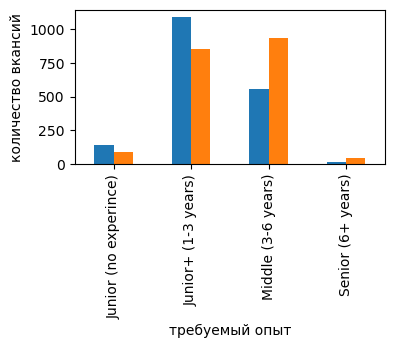

In [91]:
display(data.pivot_table(index='experience', columns= 'prof', values='id', aggfunc='count'))
data.pivot_table(index='experience', columns= 'prof', values='id', aggfunc='count').plot(y=['da','sa'], kind='bar', figsize=(4,2), legend = False)
plt.ylabel('количество вкансий')
plt.xlabel('требуемый опыт')
plt.show()

<font color='blue'> Проверим как распределены вакансии по грейду по отдельности для DA и SA

In [94]:
display(da.groupby('experience')['id'].count())
da.groupby('experience')['id'].count().transform(lambda x: 100 * x / x.sum())
#da.groupby('experience')['id'].count().transform(lambda x: 100 * x / x.sum()).plot(kind = 'pie')

experience
Junior (no experince)     142
Junior+ (1-3 years)      1091
Middle (3-6 years)        555
Senior (6+ years)          13
Name: id, dtype: int64

experience
Junior (no experince)     7.884509
Junior+ (1-3 years)      60.577457
Middle (3-6 years)       30.816213
Senior (6+ years)         0.721821
Name: id, dtype: float64

Из 1801 вакансии больше свего ищут категорию Junior+ (1-3 years) 1091 вкансия - 60.6%, 555 вакансий на Middle (3-6 years) или 30,8%, соскателей без опыт ищут реже - всего 142 вакансии для Junior (no experince) - 7,9%. Реже всего ищут Senior (6+ years) всего 13 вакансий или 0,7%. Скорее всего это обусловлено высокой степенью квалификации и такого рода сотрудников могут искать используя другие каналы на пример конференции, неформальные каналы, сообщества в соц.сетях. 


In [97]:
display(sa.groupby('experience')['id'].count())
sa.groupby('experience')['id'].count().transform(lambda x: 100 * x / x.sum())

experience
Junior (no experince)     86
Junior+ (1-3 years)      852
Middle (3-6 years)       933
Senior (6+ years)         44
Name: id, dtype: int64

experience
Junior (no experince)     4.490862
Junior+ (1-3 years)      44.490862
Middle (3-6 years)       48.720627
Senior (6+ years)         2.297650
Name: id, dtype: float64

По вакансиям sa из 1915 в отличии от da наибольшую долю в структуре вакансий занимают Middle (3-6 years) - 48,72% или 933 , 44,5% или 852 вакансии для Junior+ (1-3 years), для Junior (no experince) всего 86 вакансий или 4,5%. Senior (6+ years) ищут в 2,3% или 44 вакансиях.

#### Определение типичного места работы для Аналитика данных и Системного аналитика по следующим параметрам: ТОП-работодателей, фзарплата, тип занятости, график работы. 

In [105]:
display(da.groupby('employer')['id'].count().sort_values(ascending = False).head(10))

employer
сбер                                     243
wildberries                               43
ozon                                      34
банк втб (пао)                            28
т1                                        26
магнит, розничная сеть                    24
мтс                                       22
okko                                      19
центральный банк российской федерации     16
яндекс                                    15
Name: id, dtype: int64

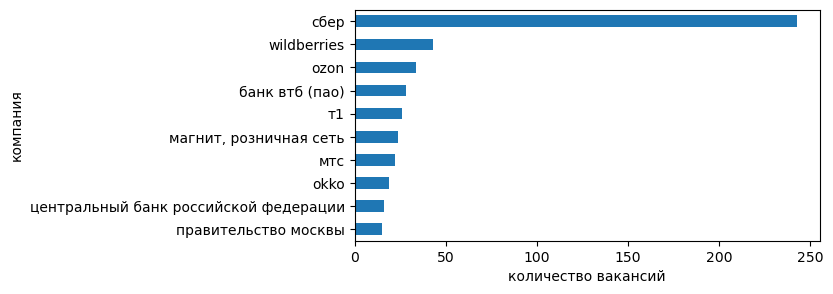

In [107]:
#display(da.pivot_table(index='employer', values='id', aggfunc='count').sort_values('id', ascending=False).head(10))
da.pivot_table(index='employer', values='id', aggfunc='count').sort_values('id', ascending= True).tail(10).plot(y = 'id', kind='barh', figsize=(6, 3), legend = False)
plt.ylabel('компания')
plt.xlabel('количество вакансий')
plt.show()

Лидерство по размещенным вакансия da занимает сбер с 243 вакансиями, с заметным отставанием wildberries - 43 и ozon 34 вакансии. В 5-ку лидер также вошли банк втб - 28 вакансий и ит-холдинг т1 - 26 вакансий.  

In [110]:
display(sa.groupby('employer')['id'].count().sort_values(ascending = False).head(10))

employer
сбер                                    95
т1                                      80
aston                                   65
совкомбанк технологии                   37
псб (пао «промсвязьбанк»)               30
selecty                                 22
т-банк                                  22
билайн                                  18
ростелеком информационные технологии    18
прикладные технологии                   16
Name: id, dtype: int64

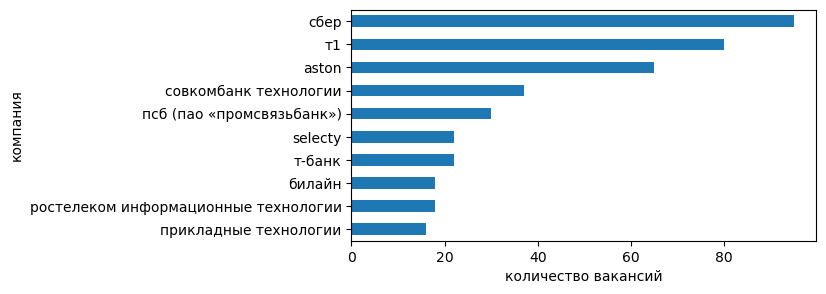

In [112]:
sa.pivot_table(index='employer', values='id', aggfunc='count').sort_values('id', ascending= True).tail(10).plot(y = 'id', kind='barh', figsize=(6, 3), legend = False)
plt.ylabel('компания')
plt.xlabel('количество вакансий')
plt.show()

Лидерство по размещенным вакансия как и у da в вакансиях sa занимает сбер с 95 вакансиями, за ним следует ит-холдинг т1 - 43, aston 34 вакансии в 5-ку лидеров также вошли совкомбанк технологии - 37, ПСБ (ПАО «Промсвязьбанк») - 30 вакансий. Распределение по ТОП-10 более "ровное" по сравнению с da, больше представлены банки или их дочерние структуры

##### Зарплатные предложения 

<font color='blue'> Проверим распределение обозначенных в вакансиях начальных зарплат по грейдам для DA и SA

prof,da,sa
experience,,
Junior (no experince),64702.0,65161.0
Junior+ (1-3 years),98010.0,131703.0
Middle (3-6 years),173963.0,207499.0
Senior (6+ years),156667.0,206698.0


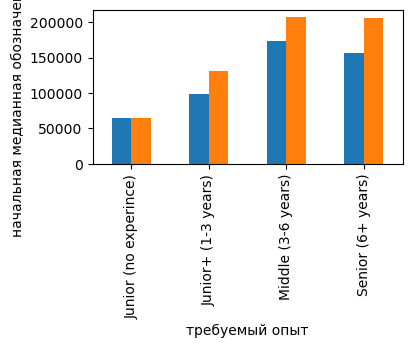

In [120]:
display(round(data.pivot_table(index='experience', columns= 'prof', values='salary_from', aggfunc='mean'),0))
round(data.pivot_table(index='experience', columns= 'prof', values='salary_from', aggfunc='mean'),0).plot(y=['da','sa'], kind='bar', figsize=(4,2), legend = False)
plt.ylabel('начальная медианная обозначенная ЗП ')
plt.xlabel('требуемый опыт')
plt.show()
#display(round(data.groupby(['data, experience'])['salary_from'].mean(),0))
#round(sa.groupby('experience')['salary_from'].mean(),0).plot(y = 'id', kind='bar', figsize=(6, 4), legend = False)

<font color='blue'> Проверим распределение по обозначенным в ваканиях нижне границе заработной платы

experience
Junior (no experince)     64702.0
Junior+ (1-3 years)       98010.0
Middle (3-6 years)       173963.0
Senior (6+ years)        156667.0
Name: salary_from, dtype: float64

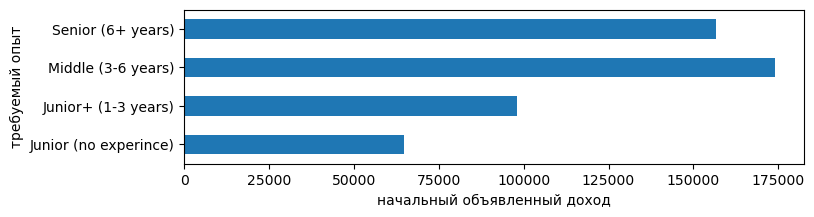

In [122]:
display(round(da.groupby('experience')['salary_from'].mean(),0))
round(da.groupby('experience')['salary_from'].mean(),0).plot(y = 'id', kind='barh', figsize=(8, 2), legend = False)

plt.ylabel('требуемый опыт')
plt.xlabel('начальный объявленный доход')
plt.show()

Оценка медианного дохода в вакансиях с указанным параметром самая низка у Junior (no experince) -ЗП начиная от 64,7 т.р., Junior+ (1-3 years) - с меданой 98т.р., Middle (3-6 years) c медианой почти 174 т.р., а Senior (6+ years) меlиана составила только 156,7 т.р.

experience
Junior (no experince)     65161.0
Junior+ (1-3 years)      131703.0
Middle (3-6 years)       207499.0
Senior (6+ years)        206698.0
Name: salary_from, dtype: float64

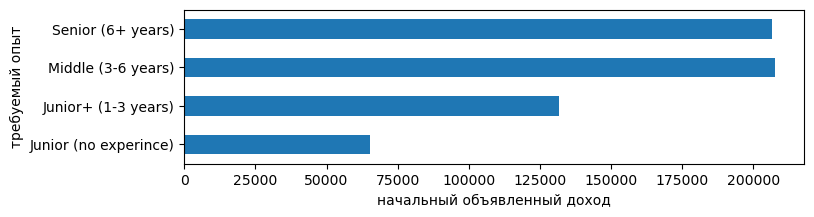

In [125]:
display(round(sa.groupby('experience')['salary_from'].mean(),0))
round(sa.groupby('experience')['salary_from'].mean(),0).plot(y = 'id', kind='barh', figsize=(8, 2), legend = False)

plt.ylabel('требуемый опыт')
plt.xlabel('начальный объявленный доход')
plt.show()

Оценка медианного дохода в вакансиях с указанным параметром самая низка у Junior (no experince) -ЗП начиная от 65.1 т.р. что сопоставимо с da, а далее имеются существенные различия: так медиана для Junior+ (1-3 years) уже 131 против 98т.р. у da, Middle (3-6 years) c медианой почти 207.5 (у da - 174 т.р.), а Senior (6+ years) медиана составила 206,7 т.р. проти 156,7 т.р. у da но ситуация аналогичная - медианная ЗП для Senior ниже чем для Middle

Оценка медианного дохода в вакансиях с указанным параметром самая низка у Junior (no experince) - 56 вакансий с ЗП начиная от 64,7 т.р., Junior+ (1-3 years) - 214 вакансий с меданой 98т.р., Middle (3-6 years) - 75 вакансий с медианой почти 174 т.р., а Senior (6+ years) на 3 ваканчии мелиана составила только 156,7 т.р.

##### Тип занятости

In [131]:
display(data.pivot_table(index='employment', columns= ['prof', 'experience'], values='id', aggfunc='count'))


prof                                   da                      \
experience          Junior (no experince) Junior+ (1-3 years)   
employment                                                      
Полная занятость                    123.0              1079.0   
Проектная работа                      1.0                 3.0   
Стажировка                           15.0                 1.0   
Частичная занятость                   3.0                 8.0   

prof                                                      \
experience          Middle (3-6 years) Senior (6+ years)   
employment                                                 
Полная занятость                 549.0              13.0   
Проектная работа                   1.0               NaN   
Стажировка                         NaN               NaN   
Частичная занятость                5.0               NaN   

prof                                   sa                      \
experience          Junior (no experince) Junior+ (1-3 years)   
employment                                                      
Полная занятость                     56.0               851.0   
Проектная работа                      NaN                 1.0   
Стажировка                           29.0                 NaN   
Частичная занятость                   1.0                 NaN   

prof                                                      
experience          Middle (3-6 years) Senior (6+ years)  
employment                                                
Полная занятость                 926.0              44.0  
Проектная работа                   2.0               NaN  
Стажировка                         NaN               NaN  
Частичная занятость                5.0               NaN

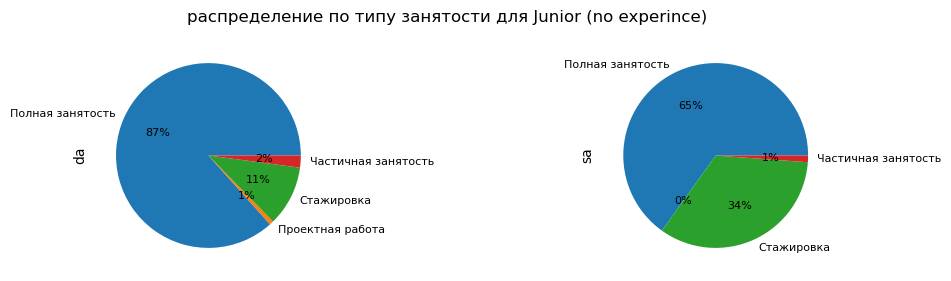

In [133]:
data.query('experience =="Junior (no experince)"').pivot_table(index='employment', columns= ['prof'], values='id', aggfunc='count').plot(kind='pie', 
      subplots = True,figsize=(12,3), autopct='%1.0f%%', textprops={'fontsize': 8},
      title ='распределение по типу занятости для Junior (no experince)', legend = False)
#plt.ylabel('количество вакансий')
#plt.xlabel('специализация')
plt.show()

По типу занятости Junior (no experince) для da примущественно 87% предлагается полная занятость, в 11% стажировка, на частичну занятость 2% и 1% на проектную работу. Для sa также предалагется в большинстве случаев 65% полня занятость стажировка в 38% предложений, 1%-чстичная занятость, вакансий на проектную работу нет.

prof,da,sa
employment,,
Полная занятость,1079.0,851.0
Проектная работа,3.0,1.0
Стажировка,1.0,NaN
Частичная занятость,8.0,NaN


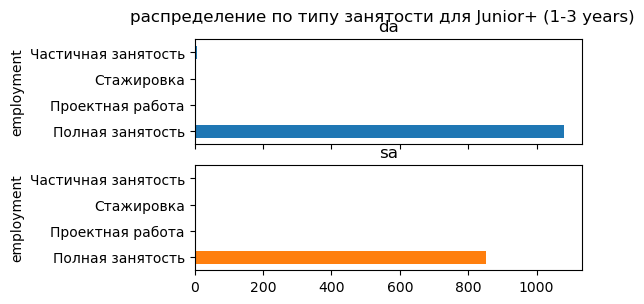

In [136]:
display(data.query('experience =="Junior+ (1-3 years)"').pivot_table(index='employment', columns= ['prof'], values='id', aggfunc='count'))
data.query('experience =="Junior+ (1-3 years)"').pivot_table(index='employment', columns= ['prof'], values='id', aggfunc='count').plot(kind='barh',
      subplots = True,figsize=(5,3), 
      title ='распределение по типу занятости для Junior+ (1-3 years)', legend = False)
#plt.ylabel('количество вакансий')
#plt.xlabel('специализация')
plt.show()

По типу занятости Junior+ (1-3 years) как для da 99%, так и для sa 100% предлагается полная занятость

prof,da,sa
employment,,
Полная занятость,549,926
Проектная работа,1,2
Частичная занятость,5,5


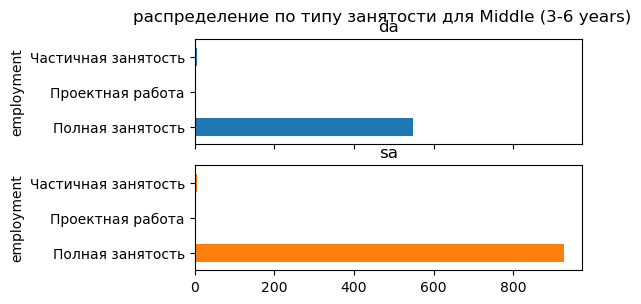

In [139]:
display(data.query('experience =="Middle (3-6 years)"').pivot_table(index='employment', columns= ['prof'], values='id', aggfunc='count'))
data.query('experience =="Middle (3-6 years)"').pivot_table(index='employment', columns= ['prof'], values='id', aggfunc='count').plot(kind='barh',
      subplots = True,figsize=(5,3), 
      title ='распределение по типу занятости для Middle (3-6 years)', legend = False)


#plt.ylabel('количество вакансий')
#plt.xlabel('специализация')
plt.show()

для Middle (3-6 years) на обе специальности в 99,9% предлагается только полная занятость

prof,da,sa
employment,,
Полная занятость,13,44


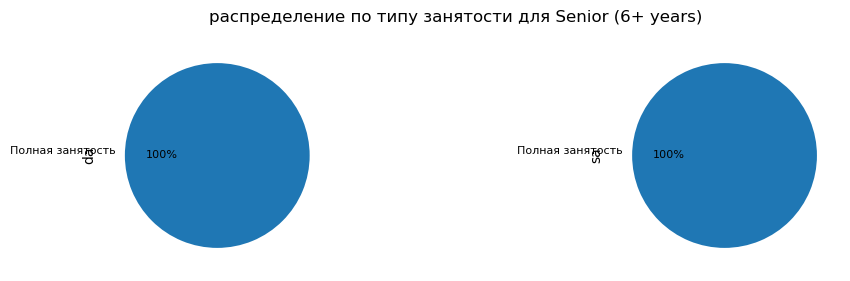

In [142]:
display(data.query('experience =="Senior (6+ years)"').pivot_table(index='employment', columns= ['prof'], values='id', aggfunc='count'))
data.query('experience =="Senior (6+ years)"').pivot_table(index='employment', columns= ['prof'], values='id', aggfunc='count').plot(kind='pie', 
      subplots = True,figsize=(12,3), autopct='%1.0f%%', textprops={'fontsize': 8}, rotatelabels=True,
      title ='распределение по типу занятости для Senior (6+ years)', legend = False)
#plt.ylabel('количество вакансий')
#plt.xlabel('специализация')
plt.show()

для Senior (6+ years) на обе специальности предлагается только полная занятость 

Распределение по графику работы у da и sa для вакансий с отсуствивием опыта выглядит следубщим образов: 
-  Junior (no experince) для da примущественно 87% предлагается полная занятость, в 11% стажировка, на частичну занятость 2% и 1% на проектную работу. Для sa также предалагется в большинстве случаев 65% полня занятость стажировка в 38% предложений, 1%-чстичная занятость, вакансий на проектную работу нет.
- для всех остальных грейдов предлагается почти в 100% случаев полная занятость, проектная работа или частичная занятость крайне редкое явление

##### График работы

In [147]:
display(data.pivot_table(index='schedule', columns= ['prof', 'experience'], values='id', aggfunc='count'))


prof                                da                                         \
experience       Junior (no experince) Junior+ (1-3 years) Middle (3-6 years)   
schedule                                                                        
Гибкий график                      3.0                21.0               17.0   
Полный день                      122.0               905.0              406.0   
Сменный график                     2.0                 7.0                NaN   
Удаленная работа                  15.0               158.0              132.0   

prof                                                  sa                      \
experience       Senior (6+ years) Junior (no experince) Junior+ (1-3 years)   
schedule                                                                       
Гибкий график                  NaN                   6.0                36.0   
Полный день                    8.0                  51.0               553.0   
Сменный график                 NaN                   NaN                 NaN   
Удаленная работа               5.0                  29.0               263.0   

prof                                                   
experience       Middle (3-6 years) Senior (6+ years)  
schedule                                               
Гибкий график                  17.0               2.0  
Полный день                   574.0              25.0  
Сменный график                  1.0               NaN  
Удаленная работа              341.0              17.0

In [149]:
#plt.style.available

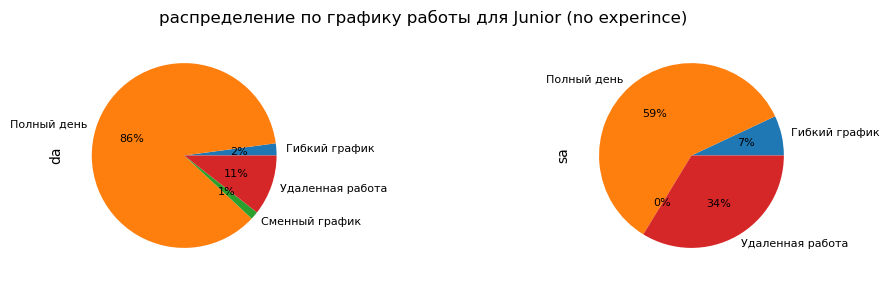

In [151]:
data.query('experience =="Junior (no experince)"').pivot_table(index='schedule', columns= ['prof'], values='id', aggfunc='count').plot(kind='pie', 
      subplots = True,figsize=(12,3), autopct='%1.0f%%', textprops={'fontsize': 8},
      title ='распределение по графику работы для Junior (no experince)', legend = False)
#plt.ylabel('количество вакансий')
#plt.xlabel('специализация')
plt.style.use('default')
plt.show()

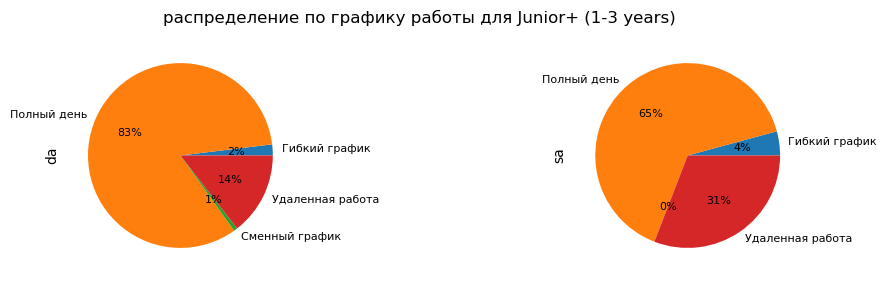

In [153]:
data.query('experience =="Junior+ (1-3 years)"').pivot_table(index='schedule', columns= ['prof'], values='id', aggfunc='count').plot(kind='pie', 
      subplots = True,figsize=(12,3), autopct='%1.0f%%', textprops={'fontsize': 8},
      title ='распределение по графику работы для Junior+ (1-3 years)', legend = False)
#plt.ylabel('количество вакансий')
#plt.xlabel('специализация')
plt.style.use('default')
plt.show()

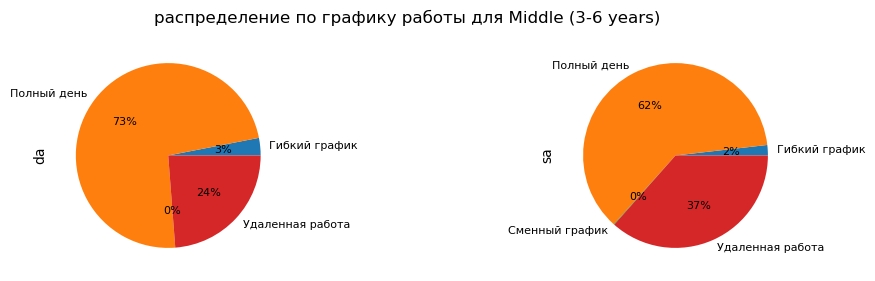

In [155]:
data.query('experience =="Middle (3-6 years)"').pivot_table(index='schedule', columns= ['prof'], values='id', aggfunc='count').plot(kind='pie',
      subplots = True,figsize=(12,3), autopct='%1.0f%%', textprops={'fontsize': 8},
      title ='распределение по графику работы для Middle (3-6 years)', legend = False)
#plt.ylabel('количество вакансий')
#plt.xlabel('специализация')
plt.show()

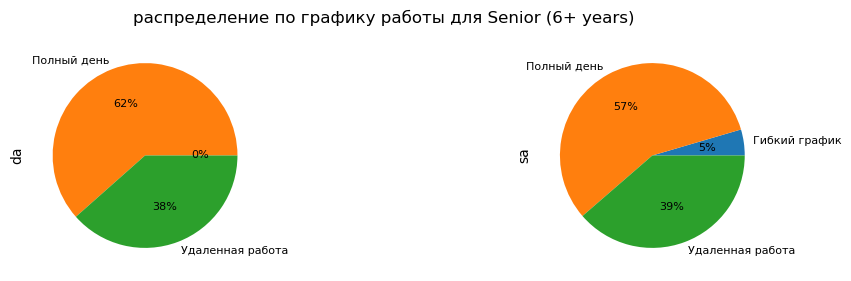

In [156]:
data.query('experience =="Senior (6+ years)"').pivot_table(index='schedule', columns= ['prof'], values='id', aggfunc='count').plot(kind='pie', 
      subplots = True,figsize=(12,3), autopct='%1.0f%%', textprops={'fontsize': 8},
      title ='распределение по графику работы для Senior (6+ years)', legend = False)
#plt.ylabel('количество вакансий')
#plt.xlabel('специализация')
plt.show()

Распределение по графику работы у da и sa для вакансий с отсуствивием опыта выглядит следубщим образов: 
- для da Junior (no experince) преобладает полный рабочий день в 86% вакансий, ужаденная работа предполагается для 11%
- для sa Junior (no experince) также пробладает полный рабочий день но уже только в 59% вакансий. удаленная работа 36%.
- гибий график для этих специальностей примерно на одном уровне 3 и 4% соответственно
Далее по мере увеличения требуемого опыта для da соотношение доля вакансий полного рабочего дня уменьшается а удаленной работы увеличивается: так для Junior+ полный рабочий день составляет уже 83%, удаленная раббоа 14%, для Middle 73% и 24% соответственно, для Senior доля удаленной рабоыты 38%, на полный рабочий день 62%.
Для sa также структура имеет тенденцию к увеличению доли удаленной работы, но диапазон изменения не такой существенный. Так для sa Junior+ доля уденной работы даже уменьшается до 31% а оля на полный рабочий день составляет 65% для Middle распределение 37% и 62% соответственно, для Senior доля удаленной работы 39%, на полный рабочий день 57%, гибкий график 5%.
Итак, для da с ростом опыта имеется тенденция к увеличению удаленной работы с 14 до 38% и уменьшению доля на поный рабочий день86 до 62%, для sa тенденции аналогичные, но динамика изменния в структуре менее выраженная: для уделанной работы диапазон изменения 31% - 39%, для поного рабочего дня 62%-57%

<font color='blue'> Распрееделение вакансий da и sa по городам 

<font color='blue'> проверим распределение вакансий DA по городам и требуемому опыту


In [162]:
da_area = da.pivot_table(index='area', columns='experience', values='id', aggfunc = 'count')
da_area = da_area.fillna(0)
da_area['Total'] = da_area['Junior (no experince)'] + da_area['Junior+ (1-3 years)'] + da_area['Middle (3-6 years)'] + da_area['Senior (6+ years)']

da_area = da_area.sort_values(by='Total', ascending=False).head(10)

display(da_area)

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years),Total
area,,,,,
москва,71.0,732.0,431.0,13.0,1247.0
санкт-петербург,19.0,106.0,56.0,0.0,181.0
екатеринбург,5.0,33.0,13.0,0.0,51.0
новосибирск,5.0,21.0,7.0,0.0,33.0
нижний новгород,6.0,20.0,7.0,0.0,33.0
владивосток,11.0,18.0,2.0,0.0,31.0
казань,1.0,17.0,11.0,0.0,29.0
краснодар,2.0,17.0,3.0,0.0,22.0
самара,0.0,9.0,2.0,0.0,11.0


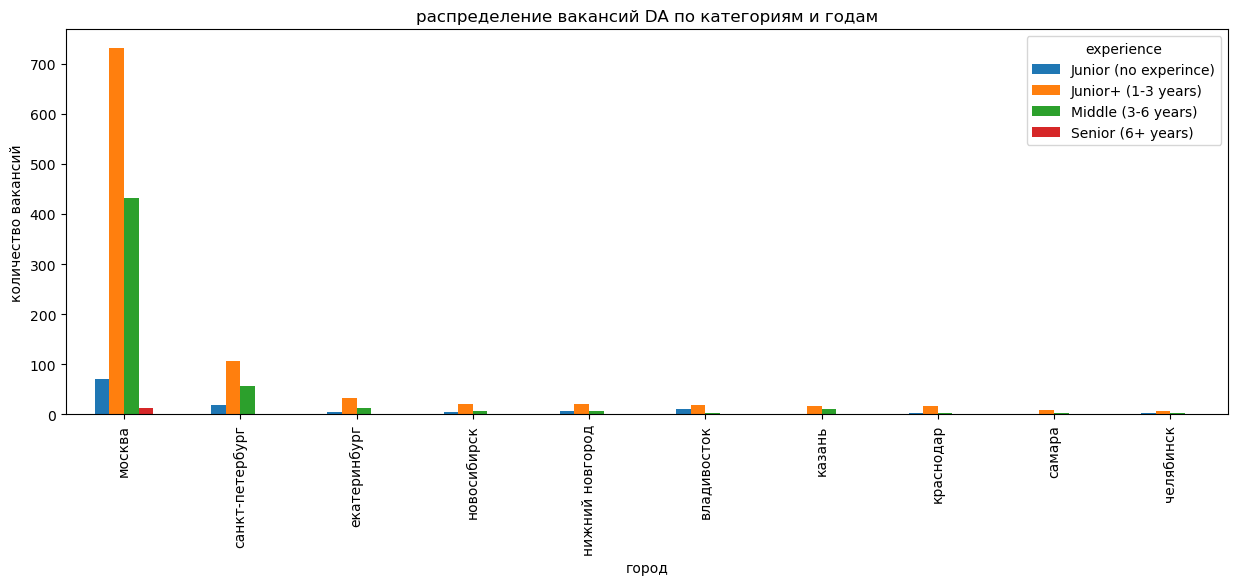

In [164]:
da_area.plot(y=['Junior (no experince)','Junior+ (1-3 years)','Middle (3-6 years)','Senior (6+ years)'], kind='bar', figsize=(15,5))
plt.title('распределение вакансий DA по категориям и годам')
plt.xlabel('город')
plt.ylabel('количество вакансий')
plt.show()

Наибольшее колиество вканасий для Junior (no experince) в Москве-71, С-Петерберге-19, Владивостоке-11, Н.Новгороде-5, Новосибирске-5
Наибольшее колиество вканасий для Junior (1-3 years) в Москве-732, С-Петерберге-106, Екатеринбурге-33, Новосибирске-21, Н.Новгороде-20, Владивостоке-18
Наибольшее колиество вканасий для Middle (3-6 years) в Москве-431, С-Петерберге-56, Екатеринбурге-13, Казань-11, Новосибирске-7, Н.Новгороде-7
Вакансии для Senior (6+ years) только в Москве - 13

<font color='blue'> Проверим распределение вакансий SA по городам и требуемому опыту

In [168]:
sa_area = sa.pivot_table(index='area', columns='experience', values='id', aggfunc = 'count')
sa_area = sa_area.fillna(0)
sa_area['Total'] = sa_area['Junior (no experince)'] + sa_area['Junior+ (1-3 years)'] + sa_area['Middle (3-6 years)'] + sa_area['Senior (6+ years)']

sa_area = sa_area.sort_values(by='Total', ascending=False).head(10)

display(sa_area)

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years),Total
area,,,,,
москва,27.0,434.0,640.0,33.0,1134.0
санкт-петербург,6.0,100.0,112.0,5.0,223.0
екатеринбург,6.0,35.0,17.0,2.0,60.0
казань,1.0,29.0,21.0,0.0,51.0
новосибирск,4.0,30.0,15.0,0.0,49.0
нижний новгород,2.0,17.0,14.0,0.0,33.0
краснодар,3.0,19.0,7.0,0.0,29.0
самара,2.0,18.0,8.0,1.0,29.0
ростов-на-дону,2.0,14.0,7.0,1.0,24.0


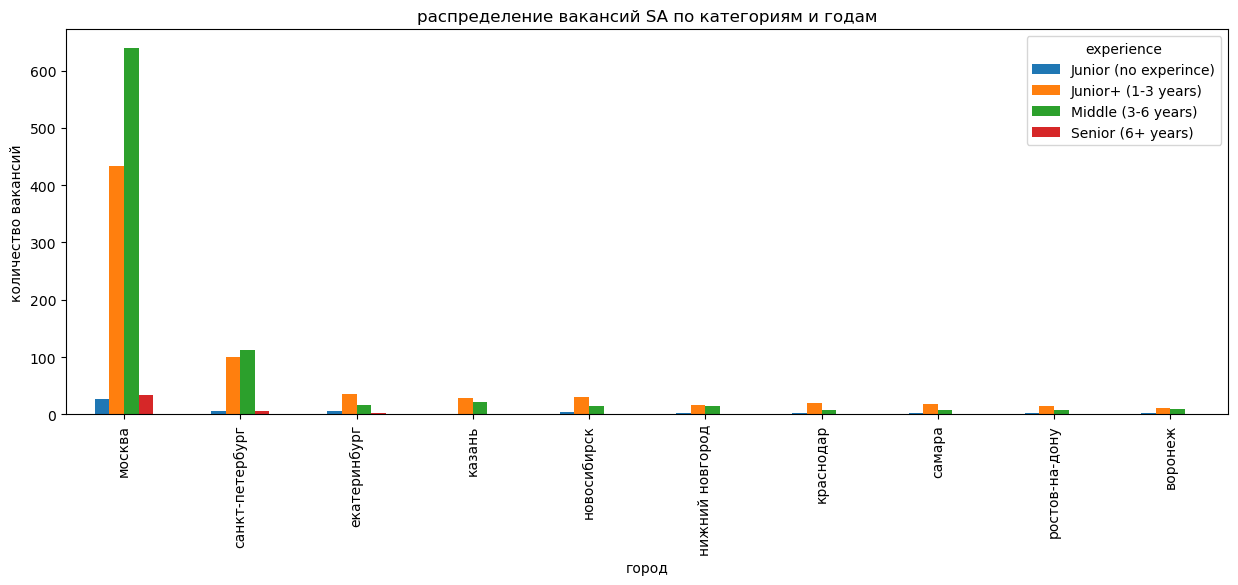

In [170]:
sa_area.plot(y=['Junior (no experince)','Junior+ (1-3 years)','Middle (3-6 years)','Senior (6+ years)'], kind='bar', figsize=(15,5))
plt.title('распределение вакансий SA по категориям и годам')
plt.xlabel('город')
plt.ylabel('количество вакансий')
plt.show()

Наибольшее колиество вканасий для Junior (no experince) в Москве-27, С-Петерберге-6, Екатеринбурге-6, Новосибирске-4, Краснодаре-3, 
Наибольшее колиество вканасий для Junior (1-3 years) в Москве-434, С-Петерберге-100, Екатеринбурге-35, Новосибирске-30, Казань-29 Краснодар-29
Наибольшее колиество вканасий для Middle (3-6 years) в Москве-640, С-Петерберге-112, Казань-21, Екатеринбурге-17,  Новосибирске-15, Н.Новгороде-14
Вакансии для Senior (6+ years) Москве - 33, С-Петерберге-5, Екатеринберг-2, по одной в Самаре и Ростове-на-Дону

По количеству вакансий на da и sa с большим отрывом лидирует Москва, далее СПб, Екатеринбург, Казань, Новосибирском, Н.Ногород

### Определv, какие навыки спрашивают чаще - твердые или мягкие. К какому грейду и к какой специальности требований больше.

# СКИЛЫ

In [177]:
data['key_skills'] = data['key_skills'].fillna('unknown')
data['key_skills_from_key_skills_field'] = data['key_skills_from_key_skills_field'].fillna('unknown')
data['soft_skills_from_description'] = data['soft_skills_from_description'].fillna('unknown')


In [179]:
data['key_skills_1']=data['key_skills_from_key_skills_field'].str.split(',', expand = True)[0]
data['key_skills_2']=data['key_skills_from_key_skills_field'].str.split(',', expand = True)[1]
data['key_skills_3']=data['key_skills_from_key_skills_field'].str.split(',', expand = True)[2]
data['key_skills_4']=data['key_skills_from_key_skills_field'].str.split(',', expand = True)[3]
data['key_skills_5']=data['key_skills_from_key_skills_field'].str.split(',', expand = True)[4]
data['key_skills_6']=data['key_skills_from_key_skills_field'].str.split(',', expand = True)[5]
data['key_skills_7']=data['key_skills_from_key_skills_field'].str.split(',', expand = True)[6]


In [181]:
data['soft_skills_1']=data['soft_skills_from_description'].str.split(',', expand = True)[0]
data['soft_skills_2']=data['soft_skills_from_description'].str.split(',', expand = True)[1]
data['soft_skills_3']=data['soft_skills_from_description'].str.split(',', expand = True)[2]
data['soft_skills_4']=data['soft_skills_from_description'].str.split(',', expand = True)[3]
data['soft_skills_5']=data['soft_skills_from_description'].str.split(',', expand = True)[4]


In [183]:
display(data.head(5))

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,key_skills_3,key_skills_4,key_skills_5,key_skills_6,key_skills_7,soft_skills_1,soft_skills_2,soft_skills_3,soft_skills_4,soft_skills_5
0,100039284,junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,dns головной офис,NaN,владивосток,Junior (no experince),"['power bi', 'субд', 'python', 'sql']",...,python,субд,None,None,None,unknown,None,None,None,None
1,100039480,аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,комус,NaN,москва,Junior (no experince),"['ms sql', 'работа с базами данных', 'ms excel']",...,excel,None,None,None,None,unknown,None,None,None,None
2,100042705,аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,dns головной офис,NaN,владивосток,Junior+ (1-3 years),"['sql', 'power bi', 'субд', 'python', 'clickho...",...,python,субд,bpmn,clickhouse,None,unknown,None,None,None,None
3,100046788,ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,х5 group,"X5 GROUP, Центральный офис",москва,Junior+ (1-3 years),"['анализ данных', 'коммуникация', 'sql', 'ms o...",...,python,hadoop,нive,аналитические исследования,навыки презентации,Коммуникация,None,None,None,None
4,100056244,аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,лукойл,NaN,москва,Middle (3-6 years),['документация'],...,None,None,None,None,None,Документация,None,None,None,None


зададим поля для индексов хард и софт скилов по первым столбцам как предположительно наиболе часто указываемых и желаемых скилов у кандидатов на вакансии

In [186]:
data['key_skills_index'] = data['key_skills_1']
data['soft_key_skills_index'] = data['soft_skills_1']

In [188]:
#display(data.head())

### HARD-skills

key_skills_index
sql              84
unknown          55
анализ данных    50
python           49
excel            35
Name: skills_sum, dtype: int64

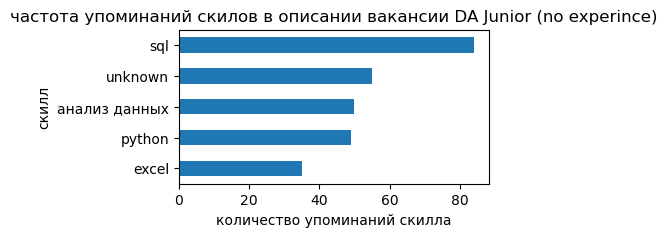

key_skills_index
sql                                    113
аналитическое мышление                  49
системный анализ                        45
unknown                                 32
работа с большим объемом информации     17
Name: skills_sum, dtype: int64

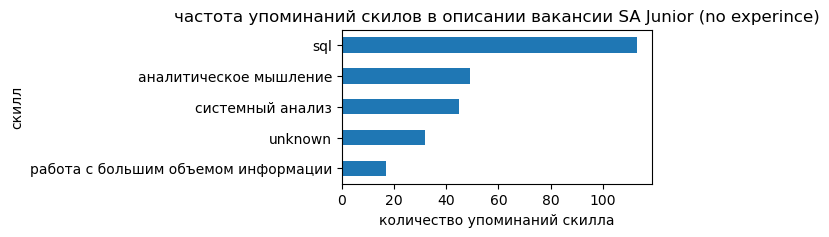

In [191]:
data_da_skills_no_exp = data.query('prof == "da" & experience == "Junior (no experince)"').pivot_table(index='key_skills_index', values = ['key_skills_1','key_skills_2','key_skills_3','key_skills_4','key_skills_5','key_skills_6','key_skills_7'],
    aggfunc='count').sort_values(by = 'key_skills_1', ascending=False) 
#.head(15)
data_da_skills_no_exp['skills_sum'] = data_da_skills_no_exp['key_skills_1']+data_da_skills_no_exp['key_skills_2']+data_da_skills_no_exp['key_skills_3']+data_da_skills_no_exp['key_skills_4']+data_da_skills_no_exp['key_skills_5']+data_da_skills_no_exp['key_skills_6']+data_da_skills_no_exp['key_skills_7']
display(data_da_skills_no_exp['skills_sum'].sort_values(ascending=False).head(5))

data_da_skills_no_exp['skills_sum'].sort_values(ascending=True).tail(5).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии DA Junior (no experince)')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

data_sa_skills_no_exp = data.query('prof == "sa"& experience == "Junior (no experince)"').pivot_table(index='key_skills_index', values = ['key_skills_1','key_skills_2','key_skills_3','key_skills_4','key_skills_5','key_skills_6','key_skills_7'],
    aggfunc='count').sort_values(by = 'key_skills_1', ascending=False) 
#.head(15)
data_sa_skills_no_exp['skills_sum'] = data_sa_skills_no_exp['key_skills_1']+data_sa_skills_no_exp['key_skills_2']+data_sa_skills_no_exp['key_skills_3']+data_sa_skills_no_exp['key_skills_4']+data_sa_skills_no_exp['key_skills_5']+data_sa_skills_no_exp['key_skills_6']+data_sa_skills_no_exp['key_skills_7']
display(data_sa_skills_no_exp['skills_sum'].sort_values(ascending=False).head(5))

data_sa_skills_no_exp['skills_sum'].sort_values(ascending=True).tail(5).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии SA Junior (no experince)')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

Junior (no experince)':
 DA: наиболее часто встречающиеся скилы sql, анализ данных, python, excel
 SA: наиболее часто встречающиеся скилы sql, аналитическое мышление, 
системный анали, работа с большим объемом информации
Что характерно для DA в большем приоритете умение пльзоваться инструментами для анализа  з

key_skills_index
sql              1473
unknown           445
python            377
анализ данных     152
excel             126
Name: skills_sum, dtype: int64

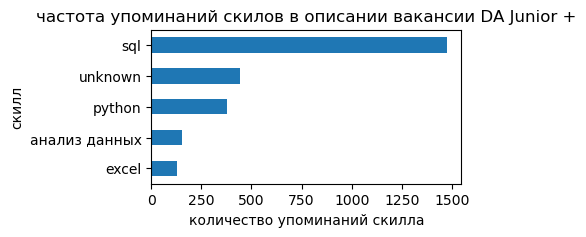

key_skills_index
sql                 662
bpmn                452
системный анализ    333
unknown             285
api                 201
Name: skills_sum, dtype: int64

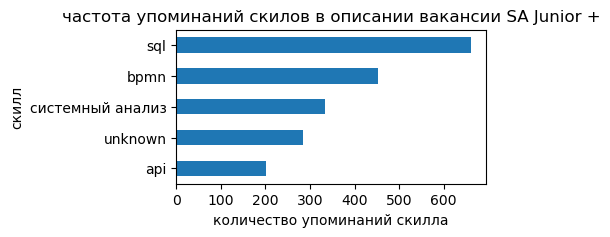

In [194]:
data_da_skills_junior = data.query('prof == "da" & experience == "Junior+ (1-3 years)"').pivot_table(index='key_skills_index', values = ['key_skills_1','key_skills_2','key_skills_3','key_skills_4','key_skills_5','key_skills_6','key_skills_7'],
    aggfunc='count').sort_values(by = 'key_skills_1', ascending=False) 
#.head(15)
data_da_skills_junior['skills_sum'] = data_da_skills_junior['key_skills_1']+data_da_skills_junior['key_skills_2']+data_da_skills_junior['key_skills_3']+data_da_skills_junior['key_skills_4']+data_da_skills_junior['key_skills_5']+data_da_skills_junior['key_skills_6']+data_da_skills_junior['key_skills_7']
display(data_da_skills_junior['skills_sum'].sort_values(ascending=False).head(5))

data_da_skills_junior['skills_sum'].sort_values(ascending=True).tail(5).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии DA Junior +')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

data_sa_skills__junior = data.query('prof == "sa"& experience == "Junior+ (1-3 years)"').pivot_table(index='key_skills_index', values = ['key_skills_1','key_skills_2','key_skills_3','key_skills_4','key_skills_5','key_skills_6','key_skills_7'],
    aggfunc='count').sort_values(by = 'key_skills_1', ascending=False) 
#.head(15)
data_sa_skills__junior['skills_sum'] = data_sa_skills__junior['key_skills_1']+data_sa_skills__junior['key_skills_2']+data_sa_skills__junior['key_skills_3']+data_sa_skills__junior['key_skills_4']+data_sa_skills__junior['key_skills_5']+data_sa_skills__junior['key_skills_6']+data_sa_skills__junior['key_skills_7']
display(data_sa_skills__junior['skills_sum'].sort_values(ascending=False).head(5))

data_sa_skills__junior['skills_sum'].sort_values(ascending=True).tail(5).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии SA Junior +')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

Junior + (1-3 years):
 DA: наиболее часто встречающиеся скилы sql, анализ данных, python, excel - такие же как и для Junior без опыта
 SA: наиболее часто встречающиеся скилы помимо ранее обозначенных для сосискателей бех опыта такие как sql, системный анализ добавляются требования к знанию bpmn и работа с  api
Для DA в большем приоритете умение пльзоваться инструментами для анализа, для SA требуются умения исользовать инструменты для описания и выстраивания процессов

key_skills_index
sql              750
python           299
unknown          206
excel             67
анализ данных     52
Name: skills_sum, dtype: int64

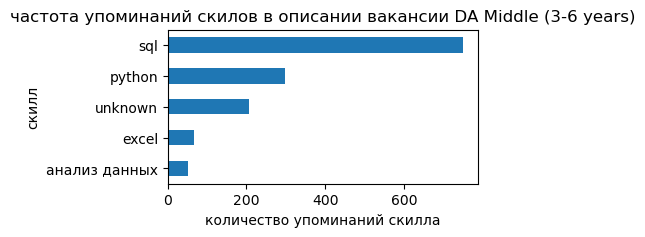

key_skills_index
sql                 795
bpmn                440
системный анализ    413
uml                 330
unknown             312
Name: skills_sum, dtype: int64

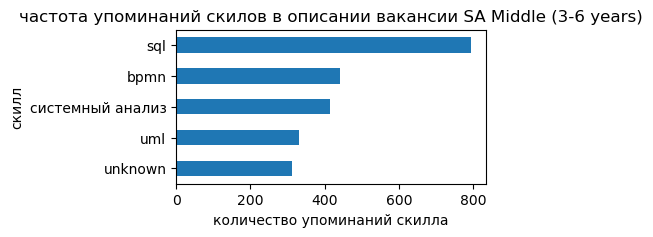

In [196]:
data_da_skills_middle = data.query('prof == "da" & experience == "Middle (3-6 years)"').pivot_table(index='key_skills_index', values = ['key_skills_1','key_skills_2','key_skills_3','key_skills_4','key_skills_5','key_skills_6','key_skills_7'],
    aggfunc='count').sort_values(by = 'key_skills_1', ascending=False) 
#.head(15)
data_da_skills_middle['skills_sum'] = data_da_skills_middle['key_skills_1']+data_da_skills_middle['key_skills_2']+data_da_skills_middle['key_skills_3']+data_da_skills_middle['key_skills_4']+data_da_skills_middle['key_skills_5']+data_da_skills_middle['key_skills_6']+data_da_skills_middle['key_skills_7']
display(data_da_skills_middle['skills_sum'].sort_values(ascending=False).head(5))

data_da_skills_middle['skills_sum'].sort_values(ascending=True).tail(5).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии DA Middle (3-6 years)')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

data_sa_skills_middle = data.query('prof == "sa"& experience == "Middle (3-6 years)"').pivot_table(index='key_skills_index', values = ['key_skills_1','key_skills_2','key_skills_3','key_skills_4','key_skills_5','key_skills_6','key_skills_7'],
    aggfunc='count').sort_values(by = 'key_skills_1', ascending=False) 
#.head(15)
data_sa_skills_middle['skills_sum'] = data_sa_skills_middle['key_skills_1']+data_sa_skills_middle['key_skills_2']+data_sa_skills_middle['key_skills_3']+data_sa_skills_middle['key_skills_4']+data_sa_skills_middle['key_skills_5']+data_sa_skills_middle['key_skills_6']+data_sa_skills_middle['key_skills_7']
display(data_sa_skills_middle['skills_sum'].sort_values(ascending=False).head(5))

data_sa_skills_middle['skills_sum'].sort_values(ascending=True).tail(5).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии SA Middle (3-6 years)')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

Middle (3-6 years):
 DA: и снова наиболее часто встречающиеся скилы sql, анализ данных, python, excel - такие же как и для Junior без опыта и Junior+
 SA: наиболее часто встречающиеся скилы помимо ранее обозначенных для сосискателей бех опыта такие как sql, системный анализ добавляются требования к знанию bpmn и uml
Для DA в большем приоритете умение пльзоваться инструментами для анализа, для SA требуются умения исользовать инструменты для описания и выстраивания процессов, систематизации и структурированию

key_skills_index
sql                  24
python               23
основы баз данных     7
unknown               2
Name: skills_sum, dtype: int64

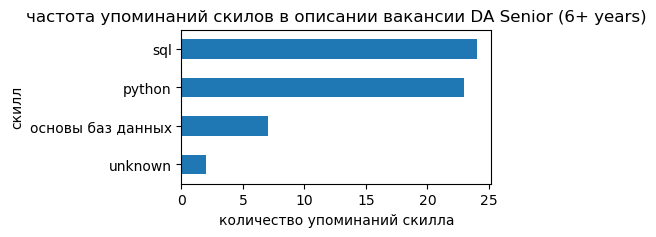

key_skills_index
системный анализ    42
sql                 31
bpmn                26
uml                 20
api                 14
Name: skills_sum, dtype: int64

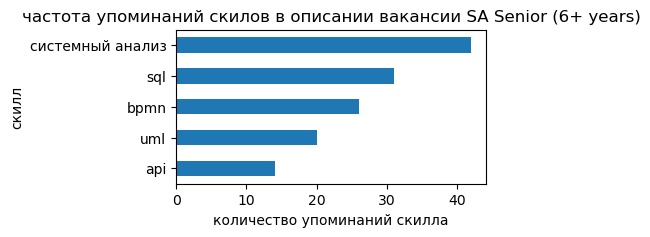

In [198]:
data_da_skills_senior = data.query('prof == "da" & experience == "Senior (6+ years)"').pivot_table(index='key_skills_index', values = ['key_skills_1','key_skills_2','key_skills_3','key_skills_4','key_skills_5','key_skills_6','key_skills_7'],
    aggfunc='count').sort_values(by = 'key_skills_1', ascending=False) 
#.head(15)
data_da_skills_senior['skills_sum'] = data_da_skills_senior['key_skills_1']+data_da_skills_senior['key_skills_2']+data_da_skills_senior['key_skills_3']+data_da_skills_senior['key_skills_4']+data_da_skills_senior['key_skills_5']+data_da_skills_senior['key_skills_6']+data_da_skills_senior['key_skills_7']
display(data_da_skills_senior['skills_sum'].sort_values(ascending=False).head(5))

data_da_skills_senior['skills_sum'].sort_values(ascending=True).tail(5).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии DA Senior (6+ years)')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

data_sa_skills_senior = data.query('prof == "sa"& experience == "Senior (6+ years)"').pivot_table(index='key_skills_index', values = ['key_skills_1','key_skills_2','key_skills_3','key_skills_4','key_skills_5','key_skills_6','key_skills_7'],
    aggfunc='count').sort_values(by = 'key_skills_1', ascending=False) 
#.head(15)
data_sa_skills_senior['skills_sum'] = data_sa_skills_senior['key_skills_1']+data_sa_skills_senior['key_skills_2']+data_sa_skills_senior['key_skills_3']+data_sa_skills_senior['key_skills_4']+data_sa_skills_senior['key_skills_5']+data_sa_skills_senior['key_skills_6']+data_sa_skills_senior['key_skills_7']
display(data_sa_skills_senior['skills_sum'].sort_values(ascending=False).head(5))

data_sa_skills_senior['skills_sum'].sort_values(ascending=True).tail(5).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии SA Senior (6+ years)')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

Senior (6+ years):
 DA: кроме уже вывленных ранее хардов sql, анализ данных, python для менее опытных соискателей для Senior появляется требвание знаний основ баз данных, преполагается что опытный Senior кроме непосредственного анализа данных имеет практические навыки в построении баз данных
 SA: наиболее часто встречающиеся скилы помимо ранее обозначенных для сосискателей бех опыта такие как sql, системный анализ добавляются требования к знанию bpmn и uml
Для DA в большем приоритете умение пльзоваться инструментами для анализа и знание основ работы с базами данных, для SA требуются умения исользовать инструменты для описания и выстраивания процессов, систематизации и структурированию данных

Для DA для всех грейдов ключевыми ТОП-5 хардами являются sql, python, анализ данных, excel и основы баз данных для наиболее опытных сосискателей.
Для SA единственных сходством с DA является требования знаний sql, отличительными особенностями ялвется умение использовать bpmn, uml, api позволяющие описывать, систематизировать и оптимизировать бизнсс-процессы

### SOFT-skills

soft_key_skills_index
unknown                   97
Коммуникация              28
Документация              20
Аналитическое мышление     9
Проактивность              4
Name: skills_sum, dtype: int64

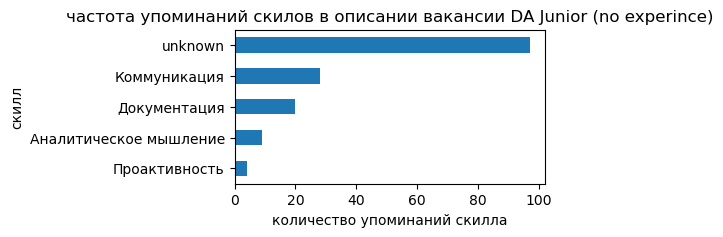

soft_key_skills_index
Документация              63
unknown                   31
Коммуникация              16
Аналитическое мышление     2
Name: skills_sum, dtype: int64

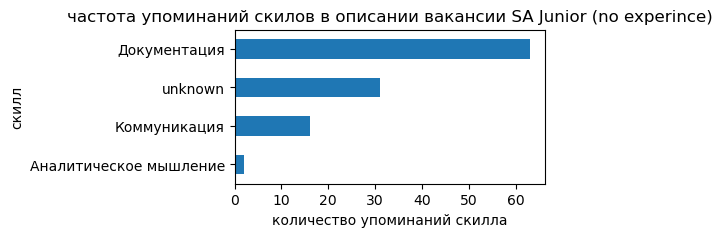

In [205]:
da_soft_junior_no_exp = data.query('prof == "da" & experience == "Junior (no experince)"').pivot_table(index='soft_key_skills_index', values = ['soft_skills_1','soft_skills_2','soft_skills_3','soft_skills_4','soft_skills_5'],
    aggfunc='count')
#.head(15)
da_soft_junior_no_exp['skills_sum'] = da_soft_junior_no_exp['soft_skills_1']+da_soft_junior_no_exp['soft_skills_2']+da_soft_junior_no_exp['soft_skills_3']+da_soft_junior_no_exp['soft_skills_4']+da_soft_junior_no_exp['soft_skills_5']
display(da_soft_junior_no_exp['skills_sum'].sort_values(ascending=False).head(5))

da_soft_junior_no_exp['skills_sum'].sort_values(ascending=True).tail(5).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии DA Junior (no experince)')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

sa_soft_junior_no_exp = data.query('prof == "sa"& experience == "Junior (no experince)"').pivot_table(index='soft_key_skills_index', values = ['soft_skills_1','soft_skills_2','soft_skills_3','soft_skills_4','soft_skills_5'],
    aggfunc='count')
#.head(15)
sa_soft_junior_no_exp['skills_sum'] = sa_soft_junior_no_exp['soft_skills_1']+sa_soft_junior_no_exp['soft_skills_2']+sa_soft_junior_no_exp['soft_skills_3']+sa_soft_junior_no_exp['soft_skills_4']+sa_soft_junior_no_exp['soft_skills_5']
display(sa_soft_junior_no_exp['skills_sum'].sort_values(ascending=False).head(5))

sa_soft_junior_no_exp['skills_sum'].sort_values(ascending=True).tail(5).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии SA Junior (no experince)')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

Junior (no experince):
 для DA и SA ключевыми навыками для соискателей без опыта работы ялвюятся работа с документацией и развитая коммуникация

soft_key_skills_index
unknown                   732
Коммуникация              152
Документация              134
Аналитическое мышление     89
Проактивность              24
Name: skills_sum, dtype: int64

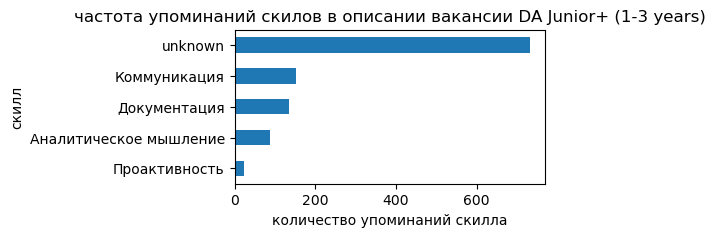

soft_key_skills_index
Документация              530
Коммуникация              233
unknown                   224
Аналитическое мышление     23
Проактивность              19
Name: skills_sum, dtype: int64

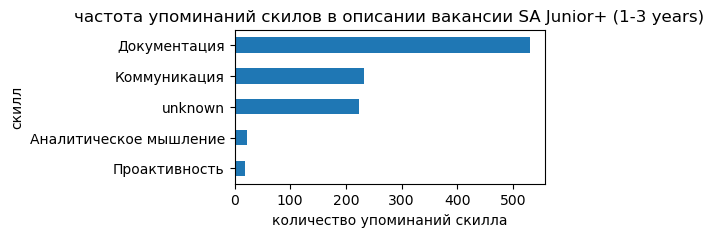

In [207]:
da_soft_jun_ = data.query('prof == "da" & experience == "Junior+ (1-3 years)"').pivot_table(index='soft_key_skills_index', values = ['soft_skills_1','soft_skills_2','soft_skills_3','soft_skills_4','soft_skills_5'],
    aggfunc='count')
#.head(15)
da_soft_jun_['skills_sum'] = da_soft_jun_['soft_skills_1']+da_soft_jun_['soft_skills_2']+da_soft_jun_['soft_skills_3']+da_soft_jun_['soft_skills_4']+da_soft_jun_['soft_skills_5']
display(da_soft_jun_['skills_sum'].sort_values(ascending=False).head(5))

da_soft_jun_['skills_sum'].sort_values(ascending=True).tail(5).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии DA Junior+ (1-3 years)')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

sa_soft_jun_ = data.query('prof == "sa"& experience == "Junior+ (1-3 years)"').pivot_table(index='soft_key_skills_index', values = ['soft_skills_1','soft_skills_2','soft_skills_3','soft_skills_4','soft_skills_5'],
    aggfunc='count')
#.head(15)
sa_soft_jun_['skills_sum'] = sa_soft_jun_['soft_skills_1']+sa_soft_jun_['soft_skills_2']+sa_soft_jun_['soft_skills_3']+sa_soft_jun_['soft_skills_4']+sa_soft_jun_['soft_skills_5']
display(sa_soft_jun_['skills_sum'].sort_values(ascending=False).head(5))

sa_soft_jun_['skills_sum'].sort_values(ascending=True).tail(5).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии SA Junior+ (1-3 years)')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

для Junior+ DA и SA ключевыми навыками для соискателей без опыта работы ялвюятся работа с документацией, развитая коммуникация и добавляется требование в наличии проактивности

soft_key_skills_index
unknown                   380
Документация              100
Коммуникация               90
Проактивность              12
Аналитическое мышление     11
Name: skills_sum, dtype: int64

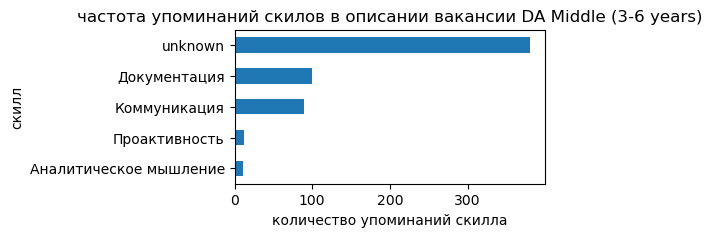

soft_key_skills_index
Документация              615
Коммуникация              249
unknown                   219
Аналитическое мышление     14
Тайм-менеджмент             7
Name: skills_sum, dtype: int64

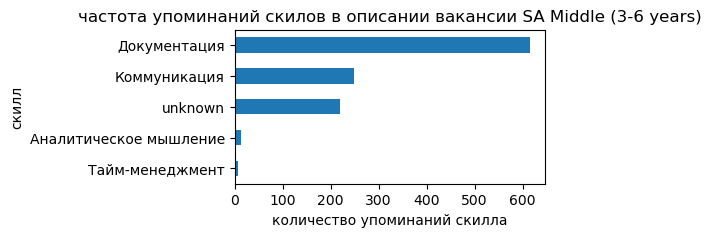

In [211]:
da_soft_midddle = data.query('prof == "da" & experience == "Middle (3-6 years)"').pivot_table(index='soft_key_skills_index', values = ['soft_skills_1','soft_skills_2','soft_skills_3','soft_skills_4','soft_skills_5'],
    aggfunc='count')
#.head(15)
da_soft_midddle['skills_sum'] = da_soft_midddle['soft_skills_1']+da_soft_midddle['soft_skills_2']+da_soft_midddle['soft_skills_3']+da_soft_midddle['soft_skills_4']+da_soft_midddle['soft_skills_5']
display(da_soft_midddle['skills_sum'].sort_values(ascending=False).head(5))

da_soft_midddle['skills_sum'].sort_values(ascending=True).tail(5).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии DA Middle (3-6 years)')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

sa_soft_midddle = data.query('prof == "sa"& experience == "Middle (3-6 years)"').pivot_table(index='soft_key_skills_index', values = ['soft_skills_1','soft_skills_2','soft_skills_3','soft_skills_4','soft_skills_5'],
    aggfunc='count')
#.head(15)
sa_soft_midddle['skills_sum'] = sa_soft_midddle['soft_skills_1']+sa_soft_midddle['soft_skills_2']+sa_soft_midddle['soft_skills_3']+sa_soft_midddle['soft_skills_4']+sa_soft_midddle['soft_skills_5']
display(sa_soft_midddle['skills_sum'].sort_values(ascending=False).head(5))

sa_soft_midddle['skills_sum'].sort_values(ascending=True).tail(5).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии SA Middle (3-6 years)')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

Middle (3-6 years):
 для DA и SA ключевыми навыками для опытных соискателей ялвятся работа с документацией, развитая коммуникация и проактивность
 для SA работа с документацией, развитая коммуникация и тайм-менеджмнт

soft_key_skills_index
Коммуникация     11
unknown           4
Проактивность     4
Документация      3
Name: skills_sum, dtype: int64

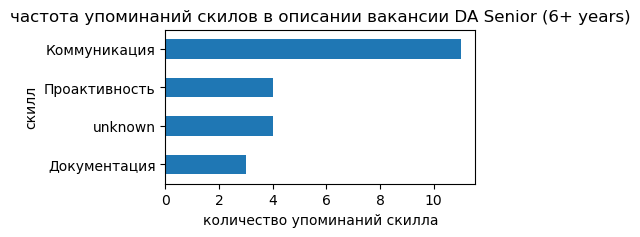

soft_key_skills_index
Документация    26
unknown         14
Коммуникация    14
Name: skills_sum, dtype: int64

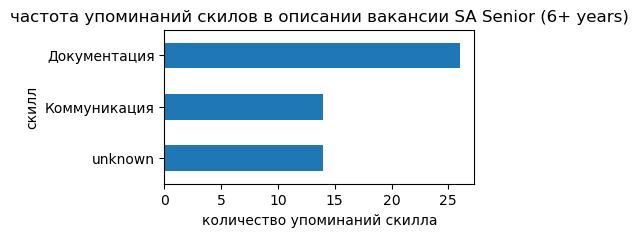

In [214]:
da_soft_senior = data.query('prof == "da" & experience == "Senior (6+ years)"').pivot_table(index='soft_key_skills_index', values = ['soft_skills_1','soft_skills_2','soft_skills_3','soft_skills_4','soft_skills_5'],
    aggfunc='count')
#.head(15)
da_soft_senior['skills_sum'] = da_soft_senior['soft_skills_1']+da_soft_senior['soft_skills_2']+da_soft_senior['soft_skills_3']+da_soft_senior['soft_skills_4']+da_soft_senior['soft_skills_5']
display(da_soft_senior['skills_sum'].sort_values(ascending=False).head(5))

da_soft_senior['skills_sum'].sort_values(ascending=True).tail(5).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии DA Senior (6+ years)')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

sa_soft_senior = data.query('prof == "sa"& experience == "Senior (6+ years)"').pivot_table(index='soft_key_skills_index', values = ['soft_skills_1','soft_skills_2','soft_skills_3','soft_skills_4','soft_skills_5'],
    aggfunc='count')
#.head(15)
sa_soft_senior['skills_sum'] = sa_soft_senior['soft_skills_1']+sa_soft_senior['soft_skills_2']+sa_soft_senior['soft_skills_3']+sa_soft_senior['soft_skills_4']+sa_soft_senior['soft_skills_5']
display(sa_soft_senior['skills_sum'].sort_values(ascending=False).head(5))

sa_soft_senior['skills_sum'].sort_values(ascending=True).tail(5).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии SA Senior (6+ years)')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

Senior (6+ years): для DA и SA ключевыми навыками по софтам является работа с документацией, развитая коммуникация и дополнительно для DA проактивность

В софт скиллах существенных отличий между DA и SA нет. Ключевыми навыками является документаци, комуникативные навыки, проактивность. для всех грейдов 

### Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Системный аналитик по следующим параметрам

* Ключевые навыки для DA:
- Junior (no experince)
    - hard-skills:sql, python, анализ данных, excel
    - soft-skills: документаци, комуникативные навыки
- Junior+
    - hard-skills:sql, python, анализ данных, excel
    - soft-skills: документаци, комуникативные навыки
- Middle:
    - hard-skills:sql, python, анализ данных, excel
    - soft-skills: документаци, комуникативные навыки, проактивность
- Senior:
    - hard-skills:sql, python, анализ данных, базы данных
    - soft-skills: документаци, комуникативные навыки, проактивность

* Ключевые навыки для SA:
- Junior (no experince)
    - hard-skills:sql, аналитическое мышление, системный анали, работа с большим объемом информации
    - soft-skills: документаци, комуникативные навыки
- Junior+
    - hard-skills:sql, системный анализ, bpmn,  api
    - soft-skills: документаци, комуникативные навыки
- Middle:
    - hard-skills:sql, системный анализ, bpmn, uml
    - soft-skills: документаци, комуникативные навыки, тайм-менеджмент
- Senior:
    - hard-skills:sql, python, анализ данных, базы данных
    - soft-skills: документаци, комуникативные навыки
 ь|



# Вводов и рекомендаций
